#### By Haijing ZHU, You SHAN, Huajuan ZHOU, Ting ZHU, Zhen XING

## Exercise1

#### (1) α=β=2

In [269]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
class kernel_density_estimator:
    def __init__(self,X,h):
        self.X=X
        self.h=h
    def f(self,x):
        self.n=len(X)
        self.σ=np.std(X)
        self.h=(4*(self.σ**(5))/(3*self.n))**(1/5)
        sum=0
        for i in range(self.n):
            phi=stats.norm.pdf((x-self.X[i])/self.h)
            sum+=phi
        return sum/(self.h*self.n)  

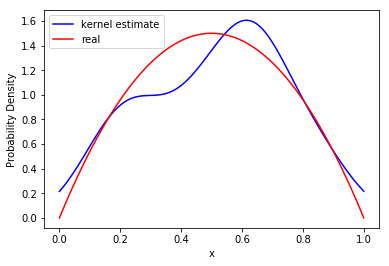

Kernel density estimate is a good estimate


In [304]:
X=np.random.beta(2,2,size=100)
kde1=kernel_density_estimator(X,0)
a=np.linspace(0,1,100)
b=kde1.f(a)
c=stats.beta.pdf(a,2,2)
plt.plot(a,b,color='b',label="kernel estimate")
plt.plot(a,c,color='r',label="real")
plt.xlabel('x')
plt.ylabel("Probability Density")
plt.legend()
plt.show()
print("Kernel density estimate is a good estimate")

#### (2)α=2 β=5

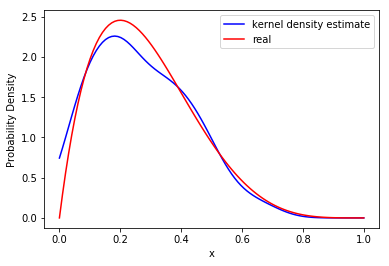

Kernel density estimate is a good estimate


In [305]:
X=np.random.beta(2,5,size=100)
kde1=kernel_density_estimator(X,0)
a=np.linspace(0,1,100)
b=kde1.f(a)
c=stats.beta.pdf(a,2,5)
plt.plot(a,b,color='b',label="kernel density estimate")
plt.plot(a,c,color='r',label="real")
plt.xlabel('x')
plt.ylabel("Probability Density")
plt.legend()
plt.show()
print("Kernel density estimate is a good estimate")

#### (3)α=β=0.5

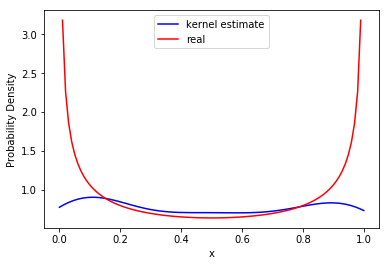

Not a very good estiimate


In [272]:
X=np.random.beta(0.5,0.5,size=100)
kde1=kernel_density_estimator(X,0)
a=np.linspace(0,1,100)
b=kde1.f(a)
c=stats.beta.pdf(a,0.5,0.5)
plt.plot(a,b,color='b',label="kernel estimate")
plt.plot(a,c,color='r',label="real")
plt.xlabel('x')
plt.ylabel("Probability Density")
plt.legend()
plt.show()
print("Not a very good estiimate")

## Exercise2

#### Solution1

##### Plot1: Showing the convergence

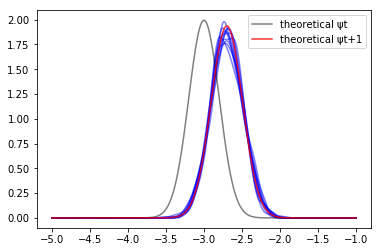

In [300]:
ρ=0.9
b=0.0
σ=0.1
μ=-3
s=0.2
c2=ρ*μ+b
c3=(ρ*ρ*s*s+σ*σ)**(0.5)
N_inf=500
N_sup=1000
interval=int((N_sup-N_inf)/10)

def ar(x):
    return ρ * x + b + σ*randn()

for n in range(N_inf,N_sup,interval):
    X=np.random.normal(μ,s,size=n)
    ar=np.vectorize(ar)
    Y=ar(X)
    kde2=kernel_density_estimator(Y,0)
    d=kde2.f(a)
    plt.plot(a,d,color='b',alpha=0.5)

a=np.linspace(-5,-1,1000)
b=stats.norm.pdf(a,μ,s)
c=stats.norm.pdf(a,c2,c3)
plt.plot(a,b,label="theoretical ψt",color='k',alpha=0.5)
plt.plot(a,c,label="theoretical ψt+1",color='r',alpha=0.8)
plt.legend()

plt.show()

##### Plot2:The specific plot for a very large n=1000

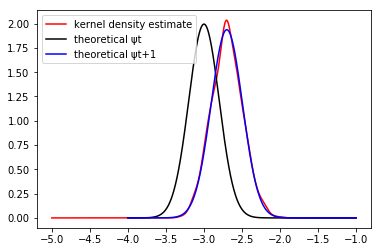

In [282]:
ρ=0.9
b=0.0
σ=0.1
μ=-3
s=0.2
n=1000
c2=ρ*μ+b
c3=(ρ*ρ*s*s+σ*σ)**(0.5)

def ar(x):
    return ρ * x + b + σ*randn()
X=np.random.normal(μ,s,size=n)
ar=np.vectorize(ar)
Y=ar(X)
Y

kde2=kernel_density_estimator(Y,0)
d=kde2.f(a)
plt.plot(a,d,label="kernel density estimate",color='r')

a=np.linspace(-4,-1,1000)
b=stats.norm.pdf(a,μ,s)
c=stats.norm.pdf(a,c2,c3)
plt.plot(a,b,label="theoretical ψt",color='k')
plt.plot(a,c,label="theoretical ψt+1",color='b')
plt.legend()

plt.show()

#### Solution2

In [306]:
import numpy as np
from numpy.random import randn
from numba import jit
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats.distributions import norm
%matplotlib inline


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

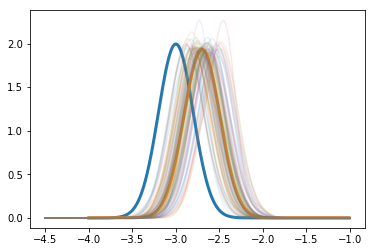

In [308]:
fig, ax = plt.subplots()
x_grid = np.linspace(-4.5, -1, 1000)
n=100
μ=-3
s=0.2
x=np.arange(-4,-1,0.01)
y=stats.norm.pdf(x,μ,s)
plt.plot(x,y,lw=3)

μ=0.9*μ
s=np.sqrt(0.81*(s**2)+0.01)
z=stats.norm.pdf(x,μ,s)
plt.plot(x,z,lw=3,alpha=2)

n=100
for i in range(n):
    m=10+20*i
    X=np.random.normal(-3,0.2,size=m)
    Y=0.9*X+0.1*randn()
    pdf = kde_scipy(Y, x_grid,bandwidth=0.1)
    ax.plot(x_grid, pdf, alpha=0.1, lw=1.5)

plt.show()